In [1]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal(shape=(3, 1), mean=0, stddev=1.)
print(x)

tf.Tensor(
[[ 0.83974844]
 [-2.4043946 ]
 [-1.252239  ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1.)
print(x)

tf.Tensor(
[[0.5619725 ]
 [0.25119364]
 [0.20748317]], shape=(3, 1), dtype=float32)


In [5]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [6]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.6079914 ],
       [-0.14734942],
       [ 0.73689365]], dtype=float32)>


In [8]:
v.assign(tf.ones(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v.assign_add(tf.ones(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [11]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [12]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
grad = tape.gradient(result, input_const)

In [14]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [15]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], 
    cov=[[1, 0.5], [0.5, 1]], 
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 1], 
    cov=[[1, 0.5], [0.5, 1]], 
    size=num_samples_per_class
)

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

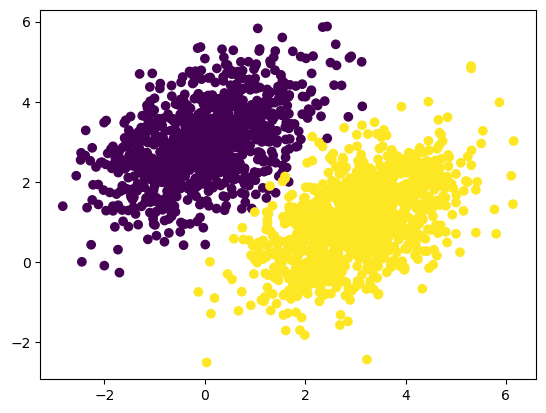

In [18]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [20]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [21]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [23]:
learning_rate = 0.1


def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 10.3766
1번째 스텝의 손실 : 5.7721
2번째 스텝의 손실 : 3.2408
3번째 스텝의 손실 : 1.8462
4번째 스텝의 손실 : 1.0765
5번째 스텝의 손실 : 0.6503
6번째 스텝의 손실 : 0.4132
7번째 스텝의 손실 : 0.2802
8번째 스텝의 손실 : 0.2046
9번째 스텝의 손실 : 0.1607
10번째 스텝의 손실 : 0.1344
11번째 스텝의 손실 : 0.1179
12번째 스텝의 손실 : 0.1070
13번째 스텝의 손실 : 0.0992
14번째 스텝의 손실 : 0.0932
15번째 스텝의 손실 : 0.0884
16번째 스텝의 손실 : 0.0843
17번째 스텝의 손실 : 0.0807
18번째 스텝의 손실 : 0.0775
19번째 스텝의 손실 : 0.0746
20번째 스텝의 손실 : 0.0718
21번째 스텝의 손실 : 0.0693
22번째 스텝의 손실 : 0.0670
23번째 스텝의 손실 : 0.0648
24번째 스텝의 손실 : 0.0628
25번째 스텝의 손실 : 0.0609
26번째 스텝의 손실 : 0.0592
27번째 스텝의 손실 : 0.0575
28번째 스텝의 손실 : 0.0560
29번째 스텝의 손실 : 0.0545
30번째 스텝의 손실 : 0.0532
31번째 스텝의 손실 : 0.0520
32번째 스텝의 손실 : 0.0508
33번째 스텝의 손실 : 0.0497
34번째 스텝의 손실 : 0.0487
35번째 스텝의 손실 : 0.0478
36번째 스텝의 손실 : 0.0469
37번째 스텝의 손실 : 0.0460
38번째 스텝의 손실 : 0.0453
39번째 스텝의 손실 : 0.0446


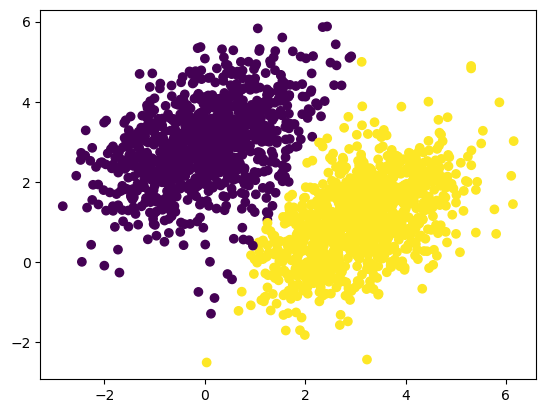

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

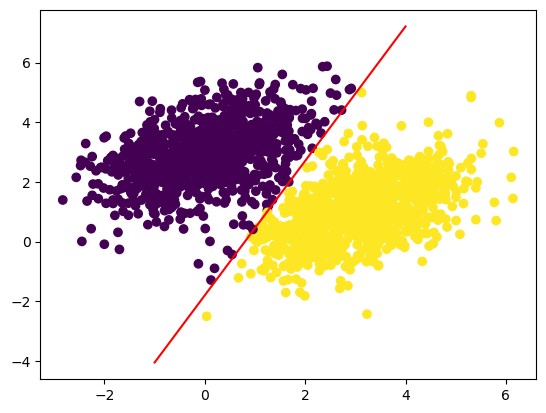

In [26]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [1]:
from tensorflow import keras


class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [3]:
import tensorflow as tf

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [4]:
from tensorflow.keras import layers

layer = layers.Dense(32, activation='relu')

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

In [6]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

In [8]:
history = model.fit(inputs, targets, epochs=5, batch_size=128)

NameError: name 'inputs' is not defined

In [10]:
import numpy as np

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1), 
              loss=keras.losses.MeanSquaredError(), 
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs, training_targets, epochs=5, batch_size=16, validation_data=(val_inputs, val_targets)
)

NameError: name 'inputs' is not defined